In [1]:
library(Seurat)

Attaching SeuratObject



In [2]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
eryp <- load(file='../../data/intermediate/cite-seq/seurat-initial-qc.Robj')

In [9]:
eryp <- RunUMAP(eryp, dims = 1:10)

Warning message:
“The following arguments are not used: dims”
16:09:15 UMAP embedding parameters a = 0.9922 b = 1.112

16:09:15 Read  rows and found  numeric columns



ERROR: Error in if (n_neighbors > n_vertices) {: argument is of length zero


In [19]:
current.cluster.ids <- c(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
new.cluster.ids <- c(
    "ETD1", # Cluster 0
    "CEP2", # Cluster 1: Tmem14c
    "ETD2", # Cluster 2
    "ETD3", # Cluster 3
    "CEP1", # Cluster 4: Ddx21
    "EEP", # Cluster 5: Vim
    "ETD4", # Cluster 6
    "MPP", # Cluster 7: Hlf, Gcnt2
    "Monocytes", # Cluster 8: Csf1r
    "Megakaryocytes", # Cluster 9: Pf4, Itga2b
    "Granulocytes" # Cluster 10 Ngp
)

In [20]:
eryp@ident <- plyr::mapvalues(x = eryp@ident, from = current.cluster.ids, to = new.cluster.ids)

In [21]:
eryp <- RunTSNE(object = eryp, dims.use = 1:10, do.fast = FALSE)

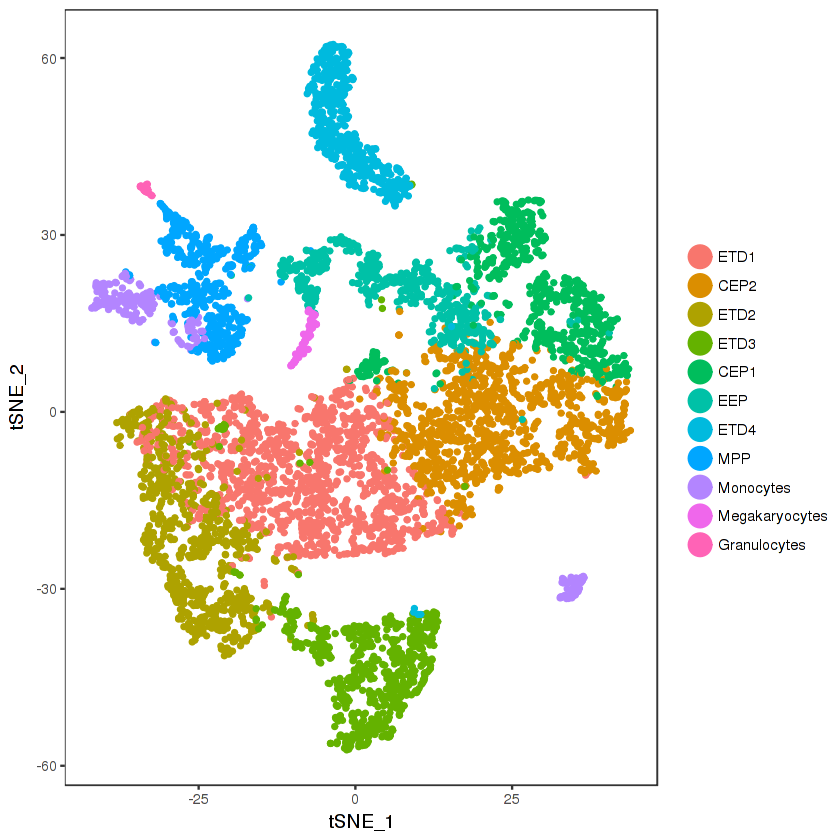

In [22]:
TSNEPlot(eryp)

In [408]:
write.csv(eryp@ident, '../../data//intermediate/cite-seq/clusters.csv')